In [1]:
# Check version inside your Python program
from platform import python_version
print(python_version())

3.6.9


In [2]:
import cv2
import numpy as np
import skimage
from matplotlib import pyplot as plt

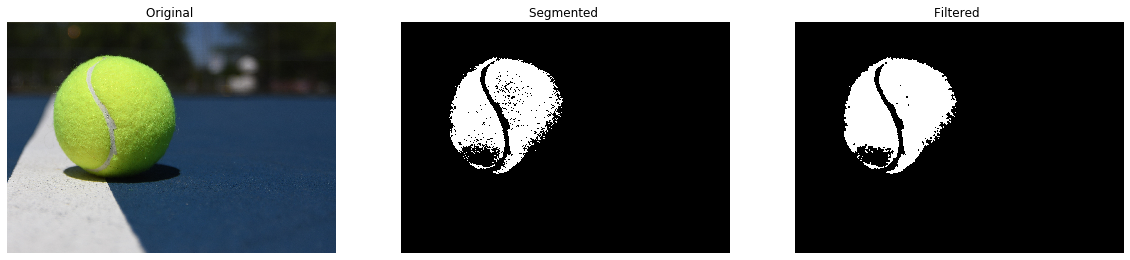

In [27]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7)
filtered = closing(filtered, kernel)
kernel = disk(3)
filtered = opening(filtered, kernel)

image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off')  

plt.subplot(1, 3, 2)
plt.imshow(segmented, cmap='gray')           
plt.title('Segmented ')
plt.axis('off') 

plt.subplot(1, 3, 3)
plt.imshow(filtered, cmap='gray')           
plt.title('Filtered ')
plt.axis('off') 

plt.show() 

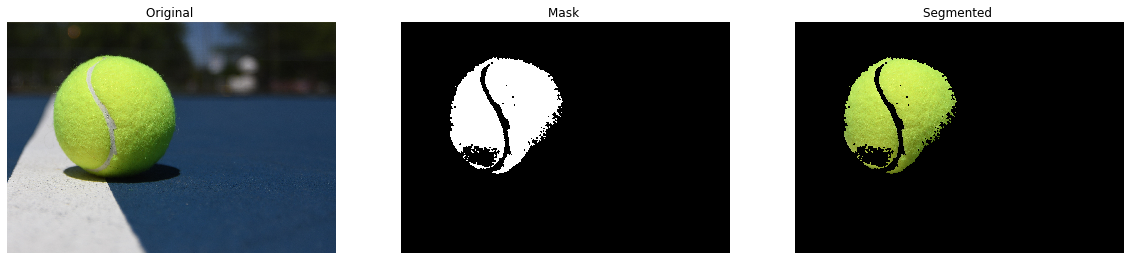

In [76]:
image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7)
filtered = closing(filtered, kernel)
kernel = disk(3)
filtered = opening(filtered, kernel)

# RGB segmented
image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Para aplicar una mascara se utiliza la funcion bitwise_and
new_segmented = cv2.bitwise_and(image,image,mask = filtered)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered, cmap='gray')           
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(new_segmented)           
plt.title('Segmented ')
plt.axis('off')

plt.show()

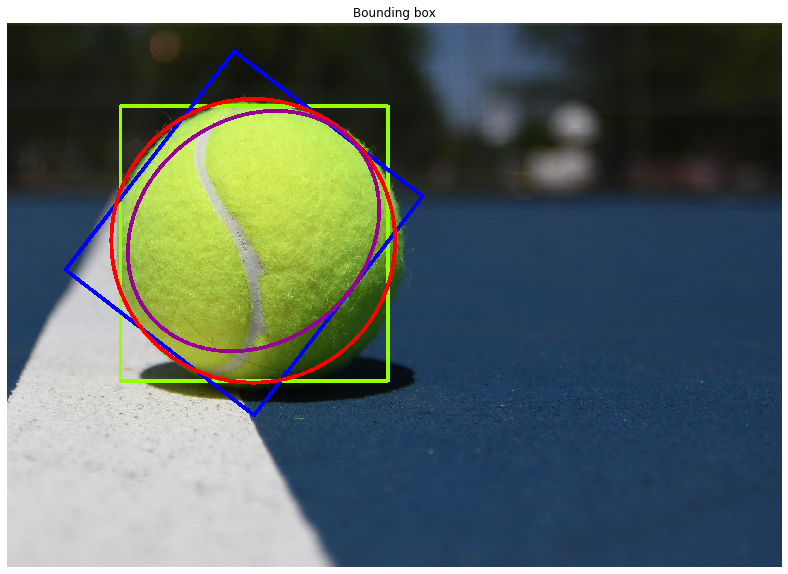

In [70]:
image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7) #7
filtered = closing(filtered, kernel)
kernel = disk(3) #1
filtered = opening(filtered, kernel)

# Para calcular el bounding box es primero necesario hallar los contornos
contours, _ = cv2.findContours(filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_sel = []

# Se filtran los contornos para solo tener contornos mas grandes a cierta area
thresh_area = 10000.0

for ii in range(len(contours)):
    area = cv2.contourArea(contours[ii])
    if(area>thresh_area):
        contours_sel.append(contours[ii])

# Se calculan tanto un bounding box como un bounding box rotado, un bounding circle y
#  una bounding ellipse
image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for ii in range(len(contours_sel)):
    cnt = contours_sel[ii]

    # Bounding box
    x,y,w,h = cv2.boundingRect(cnt) # Se halla el bounding box del contorno
    cv2.rectangle(image,(x,y),(x+w,y+h),(150,255,0),15) # Se dibuja el bbox sobre la imagen

    # Rotated bounding box
    rect = cv2.minAreaRect(cnt) # Se halla el rectangulo minimo que contiene el contorno
    box = cv2.boxPoints(rect)   # Se crea un arreglo con estos puntos
    box = np.int0(box)
    cv2.drawContours(image,[box],0,(0,0,255),15) # Se dibuja sobre la imagen

    # Circle
    (x,y),radius = cv2.minEnclosingCircle(cnt) 
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(image,center,radius,(255,0,0),15)

    # Ellipse
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image,ellipse,(150,0,150),15)


plt.figure(figsize=(20,10))
plt.imshow(image)           
plt.title('Bounding box')
plt.axis('off')  
plt.show()

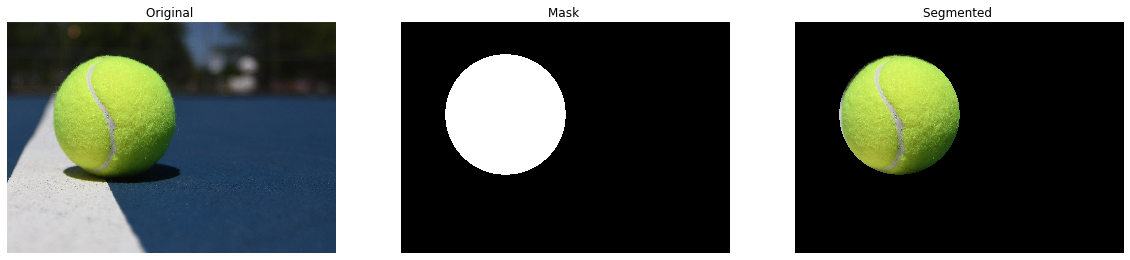

In [74]:
# Tambien es posible obtener una segmentacion con el bounding box
image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7) #7
filtered = closing(filtered, kernel)
kernel = disk(3) #1
filtered = opening(filtered, kernel)

# Para calcular el bounding box es primero necesario hallar los contornos
contours, _ = cv2.findContours(filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_sel = []

# Se filtran los contornos para solo tener contornos mas grandes a cierta area
thresh_area = 10000.0

for ii in range(len(contours)):
    area = cv2.contourArea(contours[ii])
    if(area>thresh_area):
        contours_sel.append(contours[ii])

# Se calculan tanto un bounding box como un bounding box rotado, un bounding circle y
#  una bounding ellipse
new_mask = np.zeros((filtered.shape), dtype=np.uint8)


for ii in range(len(contours_sel)):
    cnt = contours_sel[ii]
    # Circle
    (x,y),radius = cv2.minEnclosingCircle(cnt) 
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(new_mask,center,radius,255,-1)

# Para aplicar una mascara se utiliza la funcion bitwise_and
image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

new_segmented = cv2.bitwise_and(image,image,mask = new_mask)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off') 

plt.subplot(1, 3, 2)
plt.imshow(new_mask, cmap='gray')           
plt.title('Mask ')
plt.axis('off') 

plt.subplot(1, 3, 3)
plt.imshow(new_segmented)           
plt.title('Segmented ')
plt.axis('off')

plt.show()